<a href="https://colab.research.google.com/github/Umer1farooq/AI-Project/blob/main/NoteBooks/Phase_2_Data_Preprocessing_%26_Image_Generators_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# Phase 2 — Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt


In [15]:
# Base directory for your splitted dataset
base_dir = '/content/drive/MyDrive/datasets/diabetic_retinopathy_2019/splitted'

# Train / Validation / Test paths
train_dir = os.path.join(base_dir, 'train')
val_dir   = os.path.join(base_dir, 'val')
test_dir  = os.path.join(base_dir, 'test')

# Image settings
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32


In [16]:
# Training generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation generator (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

# Test generator (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)


In [17]:
# Training generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Validation generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 2562 images belonging to 5 classes.
Found 549 images belonging to 5 classes.
Found 551 images belonging to 5 classes.


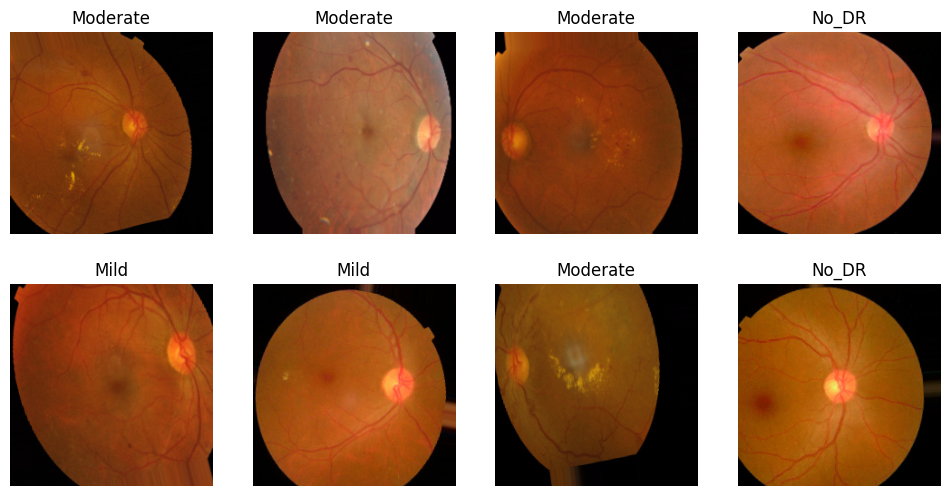

In [18]:
# Display 8 sample images from training generator
images, labels = next(train_generator)

plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i])

    class_idx = labels[i].argmax()   # one-hot -> index
    class_name = list(train_generator.class_indices.keys())[class_idx]

    plt.title(class_name)
    plt.axis('off')

plt.show()
